# First Project
Health Insurance Cross Sell Prediction

Import opendatasets untuk mengambil data

In [1]:
!pip install opendatasets

menggunakan opendatasets untuk mengambil data

In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alvinb
Your Kaggle Key: ··········


100%|██████████| 6.47M/6.47M [00:00<00:00, 22.1MB/s]

# Impor data 


import library yang dibutuhkan

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

ambil data dengan pd.read_csv

In [4]:
df_train = pd.read_csv('/content/health-insurance-cross-sell-prediction/train.csv')
df_test = pd.read_csv('/content/health-insurance-cross-sell-prediction/test.csv')
df_sample = pd.read_csv('/content/health-insurance-cross-sell-prediction/sample_submission.csv')

Training data 

In [5]:
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


Test data

In [6]:
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


Sample yang disubmit 

In [7]:
df_sample.head()

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0


# Data Information





*   id : Unique ID for the customer
*   Gender : Gender of the customer
*   Age : Age of the customer
*   Driving_License :
      * 0 : Customer does not have DL
      * 1 : Customer already has DL


*   Region_Code : Unique code for the region of the customer
*   Previously_Insured : 
    * 1 : Customer already has Vehicle Insurance, 
    * 0 : Customer doesn't have Vehicle Insurance
*   Vehicle_Age : Age of the Vehicle
*   Vehicle_Damage : 
    * 1 : Customer got his/her vehicle damaged in the past. 
    * 0 : Customer didn't get his/her vehicle damaged in the past.
*   Annual_Premium : The amount customer needs to pay as premium in the year
*   PolicySalesChannel : Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
*   Vintage : Number of Days, Customer has been associated with the company
*   Response :
    * 1 : Customer is interested 
    * 0 : Customer is not interested




In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


Cek null data

In [9]:
df_train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Statistical data 

In [10]:
df_train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


Drop kolom yang tidak digunakan 

In [11]:
df_train1 = df_train.drop('id',axis=1)

In [12]:
df_train1.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


cek shape data

In [29]:
df_train1.shape

(381109, 11)

# Data Analysis

Ambil kolom numerik

In [50]:

numeric_columns = []
for i in df_train1.columns:
  if(df_train1[i].dtypes == 'int64' or df_train[i].dtypes == 'float64'):
    numeric_columns.append(i)
print(numeric_columns)
numeric_columns.pop(1)
numeric_columns.pop(-1)
print(numeric_columns)


['Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']
['Age', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']


Ambil kolom kategori

In [18]:

categorical_columns = []
for i in df_train1.columns:
  if(df_train1[i].dtypes != 'int64' and df_train[i].dtypes != 'float64'):
    categorical_columns.append(i)
print(categorical_columns)

['Gender', 'Vehicle_Age', 'Vehicle_Damage']


Cek outliers

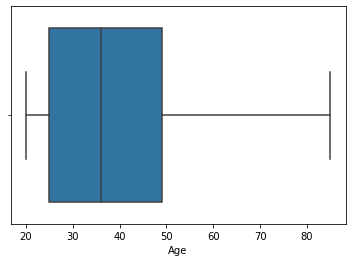

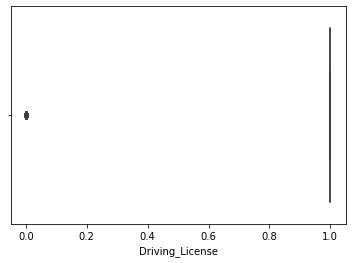

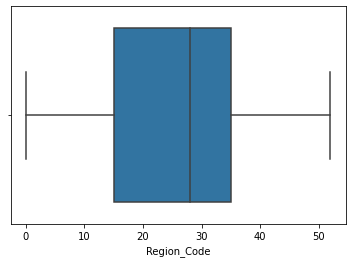

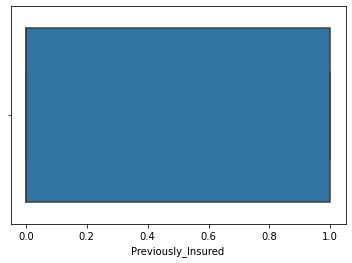

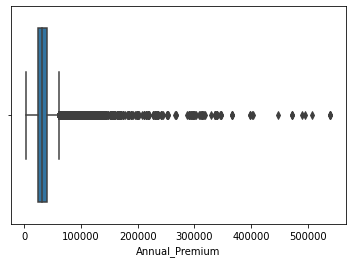

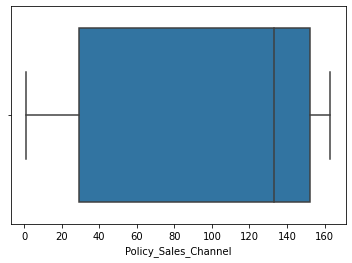

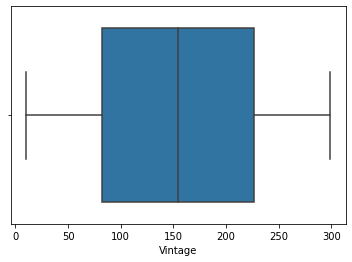

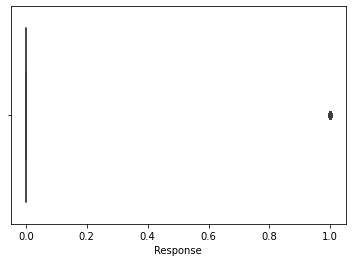

In [23]:

for col in numeric_columns :
  sns.boxplot(x=df_train1[col])
  plt.show()

Mari kita cek korelasi dari data tersebut dengan heatmap

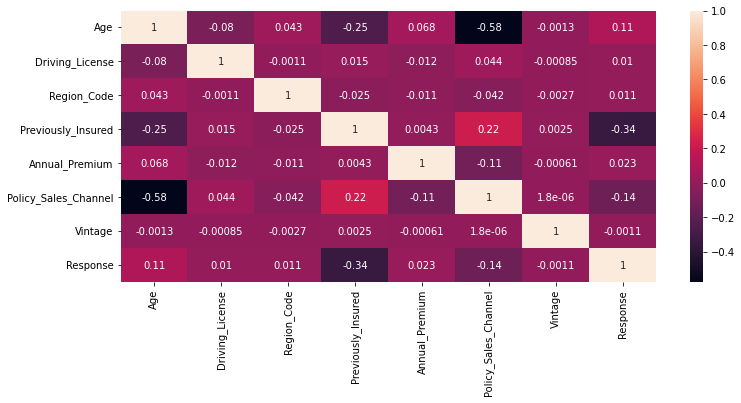

In [25]:
plt.figure(figsize = (12,5))
sns.heatmap(df_train1.corr(),annot=True)
plt.show()

Dari hasil boxplot dan heatmap, kita bisa drop row yang berada di outliers tersebut

Code dibawah merupakan menghapusan outliers

In [75]:
Q1 = df_train1[numeric_columns].quantile(0.25)
Q3 = df_train1[numeric_columns].quantile(0.75)
IQR=Q3-Q1
other_df=df_train1[~((df_train1<(Q1-1.5*IQR))|(df_train1>(Q3+1.5*IQR))).any(axis=1)]
other_df.shape

(370789, 11)

hasil dari penghapusan outliers

In [76]:
other_df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


Sekarang kita akan cek berapa hasil response yang dibagi dengan gender

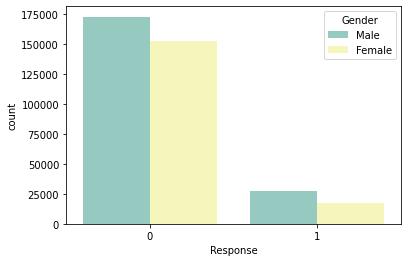

In [77]:
sns.countplot(x='Response',hue='Gender', data=other_df,palette='Set3')
plt.show()

Menariknya, banyak sekali yang menolak ketimbang menerima tawaran asuransi. Hal ini dibuktikan dari lebih banyak yang memilih angka 0 daripada angka 1. Terlebih lagi, pria sangat mendominasi dalam grafik ini.

Sekarang kita akan cek siapa yang punya driving license

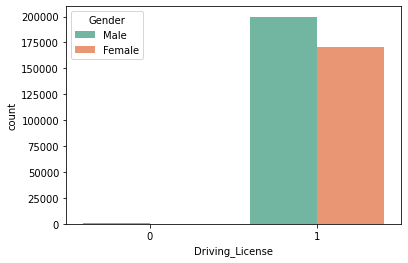

1    370026
0       763
Name: Driving_License, dtype: int64

In [78]:
sns.countplot(x='Driving_License',hue='Gender', data=other_df,palette='Set2')
plt.show()
other_df.Driving_License.value_counts()

Dari grafik ini, dibuktikan bahwa banyak pria yang memiliki driving lisence ketimbang wanita

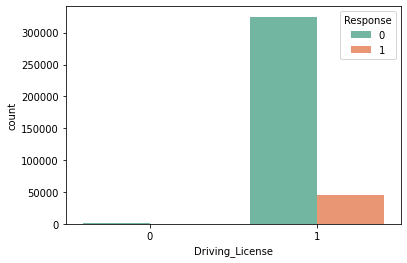

In [79]:
sns.countplot(x='Driving_License',hue='Response', data=other_df,palette='Set2')
plt.show()


Seperti yang terduga, banyak sekali orang yang berkata tidak pada asuransi dan memiliki driving license. Tetapi yang menarik adalah ada juga yang tidak memiliki driving license dan tidak juga mengambil asuransi. Tentu itu hal yang wajar karena mereka belum punya driving license

Code dibawah ini adalah code untuk histogram setiap kolom

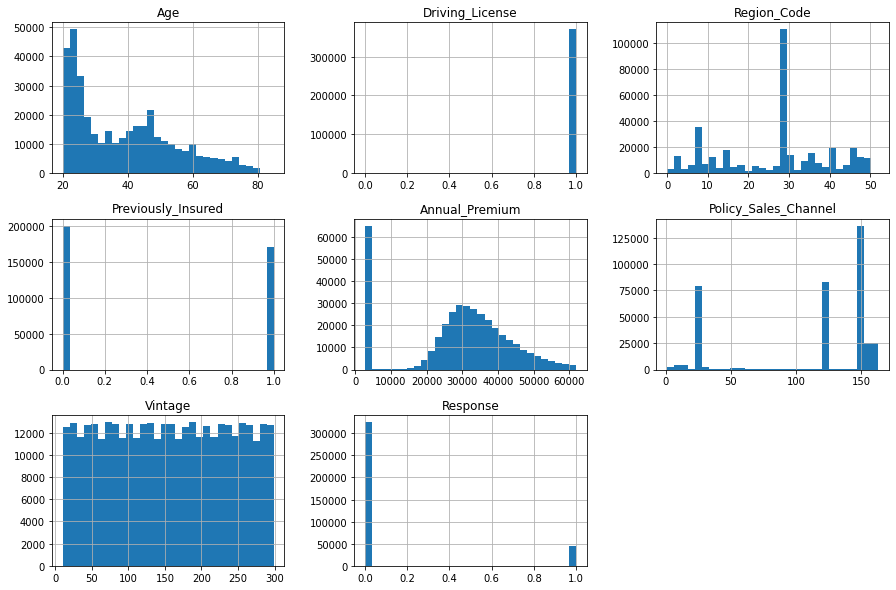

In [80]:
other_df.hist(bins=30,figsize=(15,10))
plt.show()

Code dibawah ini adalah code untuk violinplot yang akan dijelaskan tujuannya dibawah grafik ini.

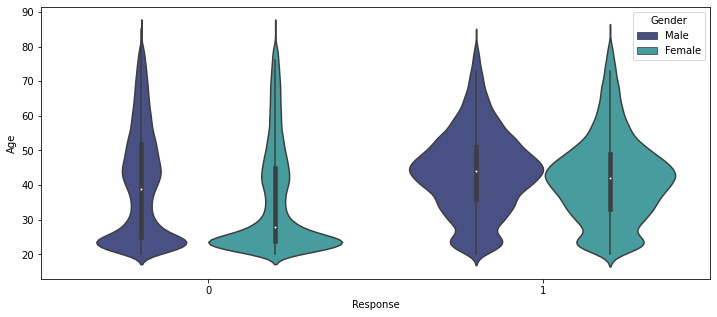

In [81]:
plt.figure(figsize=(12,5))
sns.violinplot(x = 'Response',y='Age',hue='Gender',data = other_df,palette = 'mako')
plt.show()

Grafik ini menandakan bahwa orang dewasa berumur 20-30 tahun lebih banyak berkata tidak pada asuransi. Hal ini didukung dari grafik histogram sebelumnya yang menunjukan bahwa orang berumur 20- 40 memiliki angka yang lebih besar jika dibandingkan dengan orang berumur 40 keatas. Sehingga ini menandakan bahwa besarnya respon tidak pada asuransi disebabkan karena banyak yang menawarkan asuransi kepada orang berumur 20-30 tahun. Sedangkan orang yang menerima asuransi adalah orang berumur 40-50 tahun.

# Data Preparation

one-hot encoding data kategori

In [82]:
for col in categorical_columns:
  other_df = pd.concat([other_df, pd.get_dummies(other_df[col], prefix=col, drop_first=True)],axis=1)
  other_df = other_df.drop(col,axis=1)

other_df

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,44,1,28.0,0,40454.0,26.0,217,1,1,0,1,1
1,76,1,3.0,0,33536.0,26.0,183,0,1,0,0,0
2,47,1,28.0,0,38294.0,26.0,27,1,1,0,1,1
3,21,1,11.0,1,28619.0,152.0,203,0,1,1,0,0
4,29,1,41.0,1,27496.0,152.0,39,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,74,1,26.0,1,30170.0,26.0,88,0,1,0,0,0
381105,30,1,37.0,1,40016.0,152.0,131,0,1,1,0,0
381106,21,1,30.0,1,35118.0,160.0,161,0,1,1,0,0
381107,68,1,14.0,0,44617.0,124.0,74,0,0,0,1,1


Mengubah nama kolom agar diterima oleh machine learning model

In [114]:
other_df.rename(columns = {'Vehicle_Age_< 1 Year':'Vehicle_Age_less_1_Year','Vehicle_Age_> 2 Years':'Vehicle_Age_more_2_Years'},inplace = True)
other_df

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_less_1_Year,Vehicle_Age_more_2_Years,Vehicle_Damage_Yes
0,44,1,28.0,0,40454.0,26.0,217,1,1,0,1,1
1,76,1,3.0,0,33536.0,26.0,183,0,1,0,0,0
2,47,1,28.0,0,38294.0,26.0,27,1,1,0,1,1
3,21,1,11.0,1,28619.0,152.0,203,0,1,1,0,0
4,29,1,41.0,1,27496.0,152.0,39,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,74,1,26.0,1,30170.0,26.0,88,0,1,0,0,0
381105,30,1,37.0,1,40016.0,152.0,131,0,1,1,0,0
381106,21,1,30.0,1,35118.0,160.0,161,0,1,1,0,0
381107,68,1,14.0,0,44617.0,124.0,74,0,0,0,1,1


train tes split data

In [115]:
from sklearn.model_selection import train_test_split
X = other_df.drop('Response',axis=1)
y = other_df['Response']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify = y, random_state = 42)

Standard scaler data

In [124]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training and Evaluation

Import library yang dibutuhkan 

In [133]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

penentuan model

In [126]:
lg = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xg = XGBClassifier()

Pembuatan fungsi untuk train, prediksi, dan evaluation

In [134]:

def model_test(model):
  start = time.time()
  model.fit(X_train,y_train)
  end = time.time()
  time_spent = end-start
  pred = model.predict(X_test)
  acc = accuracy_score(y_test,pred)
  print(confusion_matrix(y_test,pred))
  print("Training time spend : {} seconds".format(round(time_spent,3)))
  print("Accuracy            : {}".format(round(acc,3)))
  print(classification_report(y_test,pred))
  
  

# Hasil Logistic Regression

In [135]:
print("Logistic Regression")
model_test(lg)

Logistic Regression
[[65126     1]
 [ 9031     0]]
Training time spend : 0.913 seconds
Accuracy            : 0.878
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     65127
           1       0.00      0.00      0.00      9031

    accuracy                           0.88     74158
   macro avg       0.44      0.50      0.47     74158
weighted avg       0.77      0.88      0.82     74158



# Hasil Decision Tree

In [136]:
print("Decision Tree")
model_test(dt)

Decision Tree
[[58205  6922]
 [ 6240  2791]]
Training time spend : 1.913 seconds
Accuracy            : 0.823
              precision    recall  f1-score   support

           0       0.90      0.89      0.90     65127
           1       0.29      0.31      0.30      9031

    accuracy                           0.82     74158
   macro avg       0.60      0.60      0.60     74158
weighted avg       0.83      0.82      0.83     74158



# Hasil Random Forest Tree

In [137]:
print("Random Forest Tree")
model_test(rf)

Random Forest Tree
[[63205  1922]
 [ 7960  1071]]
Training time spend : 43.834 seconds
Accuracy            : 0.867
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     65127
           1       0.36      0.12      0.18      9031

    accuracy                           0.87     74158
   macro avg       0.62      0.54      0.55     74158
weighted avg       0.82      0.87      0.84     74158



# Hasil XGBoost

In [138]:
print('XGB')
model_test(xg)

XGB
[[65126     1]
 [ 9031     0]]
Training time spend : 13.503 seconds
Accuracy            : 0.878
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     65127
           1       0.00      0.00      0.00      9031

    accuracy                           0.88     74158
   macro avg       0.44      0.50      0.47     74158
weighted avg       0.77      0.88      0.82     74158

